## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

---

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

In [1]:
# Libraries for basic data manipulation.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Libraries for feature selection and standardizing variables.
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import StandardScaler

# Libraries for modelling.
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Libraries for NLP.
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
csv_file = '../Project 4/Jobs.csv'
df = pd.read_csv('../Project 4/Jobs.csv')
df.head(3)

Company                        Title  \
0    MONEYSMART SINGAPORE PTE. LTD.                Data Engineer   
1                PORTCAST PTE. LTD.               Data Scientist   
2  SINGAPORE PRESS HOLDINGS LIMITED  Data Visualisation Designer   

                                       Address   Job Type         Experience  \
0  GRANDE BUILDING, 8 COMMONWEALTH LANE 149555  Full Time          Executive   
1                   32 CARPENTER STREET 059911  Full Time  Middle Management   
2     NEWS CENTRE, 1000 TOA PAYOH NORTH 318994  Permanent   Junior Executive   

                 Category          Salary Num of Applications  \
0  Information Technology  $5,000to$7,000       0 application   
1             Engineering  $2,200to$6,000       0 application   
2                  Design  $3,500to$4,500      2 applications   

            Post Date             Expiry Date  \
0  Posted 30 Jan 2019  Closing on 01 Mar 2019   
1  Posted 30 Jan 2019  Closing on 01 Mar 2019   
2  Posted 30 Jan 2019  Closing on 01 Mar 2019   

                                         Description  \
0  Mission\nAs part of becoming one of the member...   
1  In this role, you will be responsible for anal...   
2  Digital arm of English, Malay, Tamil MediaGrou...   

                                        Requirements  
0  Competencies\nDegree in Computer Science or an...  
1  ●  Comfortable working with large amounts of d...  
2  Prior experience in a data visualization role\...

In [3]:
df.rename(columns={'Job Type':'Type', 'Experience':'Seniority', 'Num of Applications':'Num_Applications',
                  'Post Date':'Post_Date', 'Expiry Date':'Expiry_Date', 'Experience':'Seniority'},inplace=True)
df

Company  \
0                    MONEYSMART SINGAPORE PTE. LTD.   
1                                PORTCAST PTE. LTD.   
2                  SINGAPORE PRESS HOLDINGS LIMITED   
3                       GRABTAXI HOLDINGS PTE. LTD.   
4     AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
5                       JOHNSON & JOHNSON PTE. LTD.   
6               JABIL CIRCUIT (SINGAPORE) PTE. LTD.   
7                          ADECCO PERSONNEL PTE LTD   
8             OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
9                       EDELMAN SINGAPORE PTE. LTD.   
10                    ECQUARIA TECHNOLOGIES PTE LTD   
11    AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
12                                MACLINK PTE. LTD.   
13                               ITCAN PTE. LIMITED   
14             DIMENSION DATA (SINGAPORE) PTE. LTD.   
15            DIMENSION DATA ASIA PACIFIC PTE. LTD.   
16             DIMENSION DATA (SINGAPORE) PTE. LTD.   
17             DIMENSION DATA (SINGAPORE) PTE. LTD.   
18                     NTT DATA SINGAPORE PTE. LTD.   
19             DIMENSION DATA (SINGAPORE) PTE. LTD.   
20             DIMENSION DATA (SINGAPORE) PTE. LTD.   
21             DIMENSION DATA (SINGAPORE) PTE. LTD.   
22             DIMENSION DATA (SINGAPORE) PTE. LTD.   
23             DIMENSION DATA (SINGAPORE) PTE. LTD.   
24             DIMENSION DATA (SINGAPORE) PTE. LTD.   
25             DIMENSION DATA (SINGAPORE) PTE. LTD.   
26             DIMENSION DATA (SINGAPORE) PTE. LTD.   
27             DIMENSION DATA (SINGAPORE) PTE. LTD.   
28             DIMENSION DATA (SINGAPORE) PTE. LTD.   
29                                    CITIBANK N.A.   
...                                             ...   
4570                            COMPANY UNDISCLOSED   
4571                            COMPANY UNDISCLOSED   
4572                            COMPANY UNDISCLOSED   
4573                            COMPANY UNDISCLOSED   
4574                            COMPANY UNDISCLOSED   
4575                            COMPANY UNDISCLOSED   
4576                            COMPANY UNDISCLOSED   
4577                            COMPANY UNDISCLOSED   
4578                            COMPANY UNDISCLOSED   
4579                            COMPANY UNDISCLOSED   
4580                            COMPANY UNDISCLOSED   
4581                            COMPANY UNDISCLOSED   
4582                                            NaN   
4583                   GOVERNMENT TECHNOLOGY AGENCY   
4584                         HEALTH PROMOTION BOARD   
4585                   GOVERNMENT TECHNOLOGY AGENCY   
4586                      HEALTH SCIENCES AUTHORITY   
4587                   GOVERNMENT TECHNOLOGY AGENCY   
4588                            NANYANG POLYTECHNIC   
4589                   GOVERNMENT TECHNOLOGY AGENCY   
4590       MARITIME AND PORT AUTHORITY OF SINGAPORE   
4591                     WORKFORCE SINGAPORE AGENCY   
4592                  SKILLSFUTURE SINGAPORE AGENCY   
4593                   GOVERNMENT TECHNOLOGY AGENCY   
4594                   GOVERNMENT TECHNOLOGY AGENCY   
4595                   GOVERNMENT TECHNOLOGY AGENCY   
4596                   GOVERNMENT TECHNOLOGY AGENCY   
4597                   GOVERNMENT TECHNOLOGY AGENCY   
4598            BUILDING AND CONSTRUCTION AUTHORITY   
4599                         HEALTH PROMOTION BOARD   

                                                  Title  \
0                                         Data Engineer   
1                                        Data Scientist   
2                           Data Visualisation Designer   
3                                          Data Analyst   
4         Data Center Engineering Project Engineer APAC   
5                             Lead Data Center Engineer   
6                    Data Scientist - Intern (6 months)   
7                                         Data Engineer   
8             Data Center Fiber Optics Cabling Engineer   
9                                          

In [4]:
df.shape

(4600, 12)

<div class="alert alert-warning">

### Find out which features are correlated with Salary.

- The dataset of 4600 data jobs and 12 features is dirty and messy. 
- We need to clean it, feature engineer/extract, and perform EDA for outliers. 
- Next, we will reduce the dimensions of the dataset and proceed to modelling.

</div>

### Drop Null Values

- Our target Salary contains several null values. 
- We can either inpute with the mean/median salary or remove them entirely. 
- But we'll drop them as we still have over 3000 non-null rows.

In [5]:
df.isnull().sum()

Company              118
Title                117
Address             1160
Type                 116
Seniority            195
Category             116
Salary               631
Num_Applications     115
Post_Date            114
Expiry_Date          112
Description          111
Requirements         275
dtype: int64

In [6]:
# Drop null values.
df.dropna(subset = ["Salary"], axis = 0, inplace = True)
df.shape

(3969, 12)

- It seems there were overlaps in the null values between the features and Salary.
- But what about the null values in Company, Address, Experience and Requirements?
- The null values in Address still make up a big part of the dataset (it doesn't make sense to impute addresses).
- To save time, let's drop all the rows with null values.

In [7]:
df.isnull().sum()

Company               1
Title                 0
Address             865
Type                  0
Seniority            11
Category              0
Salary                0
Num_Applications      0
Post_Date             0
Expiry_Date           0
Description           0
Requirements         73
dtype: int64

In [8]:
df.dropna(subset = ["Company", "Address", "Seniority", "Requirements"], axis = 0, inplace = True)

In [9]:
df.shape

(3030, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3030 entries, 0 to 4576
Data columns (total 12 columns):
Company             3030 non-null object
Title               3030 non-null object
Address             3030 non-null object
Type                3030 non-null object
Seniority           3030 non-null object
Category            3030 non-null object
Salary              3030 non-null object
Num_Applications    3030 non-null object
Post_Date           3030 non-null object
Expiry_Date         3030 non-null object
Description         3030 non-null object
Requirements        3030 non-null object
dtypes: object(12)
memory usage: 307.7+ KB


### Feature Engineering & Extract Salary
- Salary is a string with a "to" between the min and max.
- Let's split them into new columns, and find the median between them.

In [11]:
df["Salary"][0:3]

0    $5,000to$7,000
1    $2,200to$6,000
2    $3,500to$4,500
Name: Salary, dtype: object

In [12]:
# New data frame with split value columns.
new = df["Salary"].str.split("to", n = 1, expand = True) 
  
# Make separate Salary_Min column from new dataframe.
df["Salary_Min"]= new[0] 
  
# Make separate Salary_Max column from new dataframe.
df["Salary_Max"]= new[1] 
  
# Drop the old Salary column.
df.drop(columns =["Salary"], inplace = True)

df

Company  \
0                        MONEYSMART SINGAPORE PTE. LTD.   
1                                    PORTCAST PTE. LTD.   
2                      SINGAPORE PRESS HOLDINGS LIMITED   
4         AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
5                           JOHNSON & JOHNSON PTE. LTD.   
6                   JABIL CIRCUIT (SINGAPORE) PTE. LTD.   
7                              ADECCO PERSONNEL PTE LTD   
8                 OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
10                        ECQUARIA TECHNOLOGIES PTE LTD   
11        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
12                                    MACLINK PTE. LTD.   
13                                   ITCAN PTE. LIMITED   
14                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
15                DIMENSION DATA ASIA PACIFIC PTE. LTD.   
16                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
17                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
18                         NTT DATA SINGAPORE PTE. LTD.   
19                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
20                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
21                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
22                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
23                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
24                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
25                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
26                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
27                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
28                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
30                      HEINEKEN ASIA PACIFIC PTE. LTD.   
31          DREAMSCAPE NETWORKS INTERNATIONAL PTE. LTD.   
32                           LEADIQ SINGAPORE PTE. LTD.   
...                                                 ...   
4530  EQUATORIAL MARINE FUEL MANAGEMENT SERVICES PTE...   
4531                      SYSMEX ASIA PACIFIC PTE. LTD.   
4537                  THE SUPREME HR ADVISORY PTE. LTD.   
4538                          IKIGAI ENABLERS PTE. LTD.   
4539                              HEALTHBEATS PTE. LTD.   
4540  NETWORK FOR ELECTRONIC TRANSFERS (SINGAPORE) P...   
4542         WINTECH NANO-TECHNOLOGY SERVICES PTE. LTD.   
4543                                        M1 NET LTD.   
4544                                         M1 LIMITED   
4545                          THE TORONTO-DOMINION BANK   
4547                     N3 RESULTS SINGAPORE PTE. LTD.   
4549                                 OAKTREE CONSULTING   
4550                                    MENCK PTE. LTD.   
4551                        MIT SEMICONDUCTOR PTE. LTD.   
4553                  CONNECT ENERGY SERVICES PTE. LTD.   
4554                            HMLET CENTRAL PTE. LTD.   
4555                  THE SUPREME HR ADVISORY PTE. LTD.   
4556                      GOOGLE ASIA PACIFIC PTE. LTD.   
4557                  THE SUPREME HR ADVISORY PTE. LTD.   
4558                          MEDS TECHNOLOGIES PTE LTD   
4559           BUSINESS EDGE PERSONNEL SERVICES PTE LTD   
4560                                      NCS PTE. LTD.   
4561                                      TVI PTE. LTD.   
4562                       COURTS (SINGAPORE) PTE. LTD.   
4563                      SCHAWK ASIA PACIFIC PTE. LTD.   
4564                              D L RESOURCES PTE LTD   
4566                              D L RESOURCES PTE LTD   
4567                              D L RESOURCES PTE LTD   
4568                           RH SYNERGY (S) PTE. LTD.   
4576                                COMPANY UNDISCLOSED   

                                                  Title  \
0                                         Data Engineer   
1                                        Data Scientist   
2                           Data Visualisation Designer   
4         Data Center Engineering Project Engineer APAC   
5                             Lead Data Center Engineer   
6                    Data Scientist

In [13]:
# Remove special characters from the salary features.
df.Salary_Max = df.Salary_Max.map(lambda x: (x.replace(',','')))
df.Salary_Max = df.Salary_Max.map(lambda x: (x.replace('$','')))
df.Salary_Min = df.Salary_Min.map(lambda x: (x.replace(',','')))
df.Salary_Min = df.Salary_Min.map(lambda x: (x.replace('$','')))

df

Company  \
0                        MONEYSMART SINGAPORE PTE. LTD.   
1                                    PORTCAST PTE. LTD.   
2                      SINGAPORE PRESS HOLDINGS LIMITED   
4         AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
5                           JOHNSON & JOHNSON PTE. LTD.   
6                   JABIL CIRCUIT (SINGAPORE) PTE. LTD.   
7                              ADECCO PERSONNEL PTE LTD   
8                 OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
10                        ECQUARIA TECHNOLOGIES PTE LTD   
11        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
12                                    MACLINK PTE. LTD.   
13                                   ITCAN PTE. LIMITED   
14                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
15                DIMENSION DATA ASIA PACIFIC PTE. LTD.   
16                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
17                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
18                         NTT DATA SINGAPORE PTE. LTD.   
19                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
20                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
21                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
22                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
23                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
24                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
25                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
26                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
27                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
28                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
30                      HEINEKEN ASIA PACIFIC PTE. LTD.   
31          DREAMSCAPE NETWORKS INTERNATIONAL PTE. LTD.   
32                           LEADIQ SINGAPORE PTE. LTD.   
...                                                 ...   
4530  EQUATORIAL MARINE FUEL MANAGEMENT SERVICES PTE...   
4531                      SYSMEX ASIA PACIFIC PTE. LTD.   
4537                  THE SUPREME HR ADVISORY PTE. LTD.   
4538                          IKIGAI ENABLERS PTE. LTD.   
4539                              HEALTHBEATS PTE. LTD.   
4540  NETWORK FOR ELECTRONIC TRANSFERS (SINGAPORE) P...   
4542         WINTECH NANO-TECHNOLOGY SERVICES PTE. LTD.   
4543                                        M1 NET LTD.   
4544                                         M1 LIMITED   
4545                          THE TORONTO-DOMINION BANK   
4547                     N3 RESULTS SINGAPORE PTE. LTD.   
4549                                 OAKTREE CONSULTING   
4550                                    MENCK PTE. LTD.   
4551                        MIT SEMICONDUCTOR PTE. LTD.   
4553                  CONNECT ENERGY SERVICES PTE. LTD.   
4554                            HMLET CENTRAL PTE. LTD.   
4555                  THE SUPREME HR ADVISORY PTE. LTD.   
4556                      GOOGLE ASIA PACIFIC PTE. LTD.   
4557                  THE SUPREME HR ADVISORY PTE. LTD.   
4558                          MEDS TECHNOLOGIES PTE LTD   
4559           BUSINESS EDGE PERSONNEL SERVICES PTE LTD   
4560                                      NCS PTE. LTD.   
4561                                      TVI PTE. LTD.   
4562                       COURTS (SINGAPORE) PTE. LTD.   
4563                      SCHAWK ASIA PACIFIC PTE. LTD.   
4564                              D L RESOURCES PTE LTD   
4566                              D L RESOURCES PTE LTD   
4567                              D L RESOURCES PTE LTD   
4568                           RH SYNERGY (S) PTE. LTD.   
4576                                COMPANY UNDISCLOSED   

                                                  Title  \
0                                         Data Engineer   
1                                        Data Scientist   
2                           Data Visualisation Designer   
4         Data Center Engineering Project Engineer APAC   
5                             Lead Data Center Engineer   
6                    Data Scientist

In [14]:
df.dtypes

Company             object
Title               object
Address             object
Type                object
Seniority           object
Category            object
Num_Applications    object
Post_Date           object
Expiry_Date         object
Description         object
Requirements        object
Salary_Min          object
Salary_Max          object
dtype: object

In [15]:
# Convert the salary features to float so that we can calculate the median value.
df["Salary_Min"] = df["Salary_Min"].astype(float)
df["Salary_Max"] = df["Salary_Max"].astype(float)

In [16]:
df["Salary_Mid"] = df["Salary_Min"] + ((df["Salary_Max"] - df["Salary_Min"])/2)
df["Salary_Mid"] = df["Salary_Mid"].astype(float)

In [17]:
df.dtypes

Company              object
Title                object
Address              object
Type                 object
Seniority            object
Category             object
Num_Applications     object
Post_Date            object
Expiry_Date          object
Description          object
Requirements         object
Salary_Min          float64
Salary_Max          float64
Salary_Mid          float64
dtype: object

In [18]:
df

Company  \
0                        MONEYSMART SINGAPORE PTE. LTD.   
1                                    PORTCAST PTE. LTD.   
2                      SINGAPORE PRESS HOLDINGS LIMITED   
4         AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
5                           JOHNSON & JOHNSON PTE. LTD.   
6                   JABIL CIRCUIT (SINGAPORE) PTE. LTD.   
7                              ADECCO PERSONNEL PTE LTD   
8                 OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
10                        ECQUARIA TECHNOLOGIES PTE LTD   
11        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
12                                    MACLINK PTE. LTD.   
13                                   ITCAN PTE. LIMITED   
14                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
15                DIMENSION DATA ASIA PACIFIC PTE. LTD.   
16                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
17                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
18                         NTT DATA SINGAPORE PTE. LTD.   
19                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
20                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
21                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
22                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
23                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
24                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
25                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
26                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
27                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
28                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
30                      HEINEKEN ASIA PACIFIC PTE. LTD.   
31          DREAMSCAPE NETWORKS INTERNATIONAL PTE. LTD.   
32                           LEADIQ SINGAPORE PTE. LTD.   
...                                                 ...   
4530  EQUATORIAL MARINE FUEL MANAGEMENT SERVICES PTE...   
4531                      SYSMEX ASIA PACIFIC PTE. LTD.   
4537                  THE SUPREME HR ADVISORY PTE. LTD.   
4538                          IKIGAI ENABLERS PTE. LTD.   
4539                              HEALTHBEATS PTE. LTD.   
4540  NETWORK FOR ELECTRONIC TRANSFERS (SINGAPORE) P...   
4542         WINTECH NANO-TECHNOLOGY SERVICES PTE. LTD.   
4543                                        M1 NET LTD.   
4544                                         M1 LIMITED   
4545                          THE TORONTO-DOMINION BANK   
4547                     N3 RESULTS SINGAPORE PTE. LTD.   
4549                                 OAKTREE CONSULTING   
4550                                    MENCK PTE. LTD.   
4551                        MIT SEMICONDUCTOR PTE. LTD.   
4553                  CONNECT ENERGY SERVICES PTE. LTD.   
4554                            HMLET CENTRAL PTE. LTD.   
4555                  THE SUPREME HR ADVISORY PTE. LTD.   
4556                      GOOGLE ASIA PACIFIC PTE. LTD.   
4557                  THE SUPREME HR ADVISORY PTE. LTD.   
4558                          MEDS TECHNOLOGIES PTE LTD   
4559           BUSINESS EDGE PERSONNEL SERVICES PTE LTD   
4560                                      NCS PTE. LTD.   
4561                                      TVI PTE. LTD.   
4562                       COURTS (SINGAPORE) PTE. LTD.   
4563                      SCHAWK ASIA PACIFIC PTE. LTD.   
4564                              D L RESOURCES PTE LTD   
4566                              D L RESOURCES PTE LTD   
4567                              D L RESOURCES PTE LTD   
4568                           RH SYNERGY (S) PTE. LTD.   
4576                                COMPANY UNDISCLOSED   

                                                  Title  \
0                                         Data Engineer   
1                                        Data Scientist   
2                           Data Visualisation Designer   
4         Data Center Engineering Project Engineer APAC   
5                             Lead Data Center Engineer   
6                    Data Scientist

### Remove Special Characters

- Let's remove special characters from the columns.

In [19]:
df["Post_Date"] = df["Post_Date"].map(lambda x: (x.replace('Posted','')))
df["Expiry_Date"] = df["Expiry_Date"].map(lambda x: (x.replace('Closing on','')))
df["Num_Applications"] = df["Num_Applications"].map(lambda x: (x.replace('applications','')))
df["Num_Applications"] = df["Num_Applications"].map(lambda x: (x.replace('application','')))

df

Company  \
0                        MONEYSMART SINGAPORE PTE. LTD.   
1                                    PORTCAST PTE. LTD.   
2                      SINGAPORE PRESS HOLDINGS LIMITED   
4         AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
5                           JOHNSON & JOHNSON PTE. LTD.   
6                   JABIL CIRCUIT (SINGAPORE) PTE. LTD.   
7                              ADECCO PERSONNEL PTE LTD   
8                 OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
10                        ECQUARIA TECHNOLOGIES PTE LTD   
11        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
12                                    MACLINK PTE. LTD.   
13                                   ITCAN PTE. LIMITED   
14                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
15                DIMENSION DATA ASIA PACIFIC PTE. LTD.   
16                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
17                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
18                         NTT DATA SINGAPORE PTE. LTD.   
19                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
20                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
21                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
22                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
23                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
24                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
25                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
26                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
27                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
28                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
30                      HEINEKEN ASIA PACIFIC PTE. LTD.   
31          DREAMSCAPE NETWORKS INTERNATIONAL PTE. LTD.   
32                           LEADIQ SINGAPORE PTE. LTD.   
...                                                 ...   
4530  EQUATORIAL MARINE FUEL MANAGEMENT SERVICES PTE...   
4531                      SYSMEX ASIA PACIFIC PTE. LTD.   
4537                  THE SUPREME HR ADVISORY PTE. LTD.   
4538                          IKIGAI ENABLERS PTE. LTD.   
4539                              HEALTHBEATS PTE. LTD.   
4540  NETWORK FOR ELECTRONIC TRANSFERS (SINGAPORE) P...   
4542         WINTECH NANO-TECHNOLOGY SERVICES PTE. LTD.   
4543                                        M1 NET LTD.   
4544                                         M1 LIMITED   
4545                          THE TORONTO-DOMINION BANK   
4547                     N3 RESULTS SINGAPORE PTE. LTD.   
4549                                 OAKTREE CONSULTING   
4550                                    MENCK PTE. LTD.   
4551                        MIT SEMICONDUCTOR PTE. LTD.   
4553                  CONNECT ENERGY SERVICES PTE. LTD.   
4554                            HMLET CENTRAL PTE. LTD.   
4555                  THE SUPREME HR ADVISORY PTE. LTD.   
4556                      GOOGLE ASIA PACIFIC PTE. LTD.   
4557                  THE SUPREME HR ADVISORY PTE. LTD.   
4558                          MEDS TECHNOLOGIES PTE LTD   
4559           BUSINESS EDGE PERSONNEL SERVICES PTE LTD   
4560                                      NCS PTE. LTD.   
4561                                      TVI PTE. LTD.   
4562                       COURTS (SINGAPORE) PTE. LTD.   
4563                      SCHAWK ASIA PACIFIC PTE. LTD.   
4564                              D L RESOURCES PTE LTD   
4566                              D L RESOURCES PTE LTD   
4567                              D L RESOURCES PTE LTD   
4568                           RH SYNERGY (S) PTE. LTD.   
4576                                COMPANY UNDISCLOSED   

                                                  Title  \
0                                         Data Engineer   
1                                        Data Scientist   
2                           Data Visualisation Designer   
4         Data Center Engineering Project Engineer APAC   
5                             Lead Data Center Engineer   
6                    Data Scientist

### Feature Extract Postal Codes
- The Address is messy with addresses written in different formats.
- Let's extract postal code instead. It'll give the exact location of the company.

In [20]:
df['Postal_Code'] = df['Address'].str.extract('(\d\d\d\d\d\d)', expand=True)
df.drop(columns =["Address"], inplace = True)
df

Company  \
0                        MONEYSMART SINGAPORE PTE. LTD.   
1                                    PORTCAST PTE. LTD.   
2                      SINGAPORE PRESS HOLDINGS LIMITED   
4         AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
5                           JOHNSON & JOHNSON PTE. LTD.   
6                   JABIL CIRCUIT (SINGAPORE) PTE. LTD.   
7                              ADECCO PERSONNEL PTE LTD   
8                 OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
10                        ECQUARIA TECHNOLOGIES PTE LTD   
11        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
12                                    MACLINK PTE. LTD.   
13                                   ITCAN PTE. LIMITED   
14                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
15                DIMENSION DATA ASIA PACIFIC PTE. LTD.   
16                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
17                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
18                         NTT DATA SINGAPORE PTE. LTD.   
19                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
20                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
21                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
22                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
23                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
24                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
25                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
26                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
27                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
28                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
30                      HEINEKEN ASIA PACIFIC PTE. LTD.   
31          DREAMSCAPE NETWORKS INTERNATIONAL PTE. LTD.   
32                           LEADIQ SINGAPORE PTE. LTD.   
...                                                 ...   
4530  EQUATORIAL MARINE FUEL MANAGEMENT SERVICES PTE...   
4531                      SYSMEX ASIA PACIFIC PTE. LTD.   
4537                  THE SUPREME HR ADVISORY PTE. LTD.   
4538                          IKIGAI ENABLERS PTE. LTD.   
4539                              HEALTHBEATS PTE. LTD.   
4540  NETWORK FOR ELECTRONIC TRANSFERS (SINGAPORE) P...   
4542         WINTECH NANO-TECHNOLOGY SERVICES PTE. LTD.   
4543                                        M1 NET LTD.   
4544                                         M1 LIMITED   
4545                          THE TORONTO-DOMINION BANK   
4547                     N3 RESULTS SINGAPORE PTE. LTD.   
4549                                 OAKTREE CONSULTING   
4550                                    MENCK PTE. LTD.   
4551                        MIT SEMICONDUCTOR PTE. LTD.   
4553                  CONNECT ENERGY SERVICES PTE. LTD.   
4554                            HMLET CENTRAL PTE. LTD.   
4555                  THE SUPREME HR ADVISORY PTE. LTD.   
4556                      GOOGLE ASIA PACIFIC PTE. LTD.   
4557                  THE SUPREME HR ADVISORY PTE. LTD.   
4558                          MEDS TECHNOLOGIES PTE LTD   
4559           BUSINESS EDGE PERSONNEL SERVICES PTE LTD   
4560                                      NCS PTE. LTD.   
4561                                      TVI PTE. LTD.   
4562                       COURTS (SINGAPORE) PTE. LTD.   
4563                      SCHAWK ASIA PACIFIC PTE. LTD.   
4564                              D L RESOURCES PTE LTD   
4566                              D L RESOURCES PTE LTD   
4567                              D L RESOURCES PTE LTD   
4568                           RH SYNERGY (S) PTE. LTD.   
4576                                COMPANY UNDISCLOSED   

                                                  Title                  Type  \
0                                         Data Engineer             Full Time   
1                                        Data Scientist             Full Time   
2                           Data Visualisation Designer             Permanent   
4         Data Center Engineering Project Engineer APAC          

### Feature Extract Month & Year
- Let's further break down the postal and expiry dates into the Month & Year respectively.

In [21]:
# Feature extract the dates into Month and Year.
df['Post_Year'] = pd.DatetimeIndex(df['Post_Date']).year
df['Post_Month'] = pd.DatetimeIndex(df['Post_Date']).month
df['Expiry_Year'] = pd.DatetimeIndex(df['Expiry_Date']).year
df['Expiry_Month'] = pd.DatetimeIndex(df['Expiry_Date']).month

# Remove the original columns.
df.drop(columns =["Post_Date"], inplace = True) 
df.drop(columns =["Expiry_Date"], inplace = True) 
df

Company  \
0                        MONEYSMART SINGAPORE PTE. LTD.   
1                                    PORTCAST PTE. LTD.   
2                      SINGAPORE PRESS HOLDINGS LIMITED   
4         AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
5                           JOHNSON & JOHNSON PTE. LTD.   
6                   JABIL CIRCUIT (SINGAPORE) PTE. LTD.   
7                              ADECCO PERSONNEL PTE LTD   
8                 OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
10                        ECQUARIA TECHNOLOGIES PTE LTD   
11        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
12                                    MACLINK PTE. LTD.   
13                                   ITCAN PTE. LIMITED   
14                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
15                DIMENSION DATA ASIA PACIFIC PTE. LTD.   
16                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
17                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
18                         NTT DATA SINGAPORE PTE. LTD.   
19                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
20                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
21                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
22                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
23                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
24                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
25                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
26                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
27                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
28                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
30                      HEINEKEN ASIA PACIFIC PTE. LTD.   
31          DREAMSCAPE NETWORKS INTERNATIONAL PTE. LTD.   
32                           LEADIQ SINGAPORE PTE. LTD.   
...                                                 ...   
4530  EQUATORIAL MARINE FUEL MANAGEMENT SERVICES PTE...   
4531                      SYSMEX ASIA PACIFIC PTE. LTD.   
4537                  THE SUPREME HR ADVISORY PTE. LTD.   
4538                          IKIGAI ENABLERS PTE. LTD.   
4539                              HEALTHBEATS PTE. LTD.   
4540  NETWORK FOR ELECTRONIC TRANSFERS (SINGAPORE) P...   
4542         WINTECH NANO-TECHNOLOGY SERVICES PTE. LTD.   
4543                                        M1 NET LTD.   
4544                                         M1 LIMITED   
4545                          THE TORONTO-DOMINION BANK   
4547                     N3 RESULTS SINGAPORE PTE. LTD.   
4549                                 OAKTREE CONSULTING   
4550                                    MENCK PTE. LTD.   
4551                        MIT SEMICONDUCTOR PTE. LTD.   
4553                  CONNECT ENERGY SERVICES PTE. LTD.   
4554                            HMLET CENTRAL PTE. LTD.   
4555                  THE SUPREME HR ADVISORY PTE. LTD.   
4556                      GOOGLE ASIA PACIFIC PTE. LTD.   
4557                  THE SUPREME HR ADVISORY PTE. LTD.   
4558                          MEDS TECHNOLOGIES PTE LTD   
4559           BUSINESS EDGE PERSONNEL SERVICES PTE LTD   
4560                                      NCS PTE. LTD.   
4561                                      TVI PTE. LTD.   
4562                       COURTS (SINGAPORE) PTE. LTD.   
4563                      SCHAWK ASIA PACIFIC PTE. LTD.   
4564                              D L RESOURCES PTE LTD   
4566                              D L RESOURCES PTE LTD   
4567                              D L RESOURCES PTE LTD   
4568                           RH SYNERGY (S) PTE. LTD.   
4576                                COMPANY UNDISCLOSED   

                                                  Title                  Type  \
0                                         Data Engineer             Full Time   
1                                        Data Scientist             Full Time   
2                           Data Visualisation Designer             Permanent   
4         Data Center Engineering Project Engineer APAC          

### Outliers in Salary_Mid
- It's strange for a data job to be commanding a $100k salary.
- But some of the jobs are in the max salary bracket.
- There are several non-data jobs in the dataset as well.
- Let's exclude them from our analysis by focusing only on data related roles.

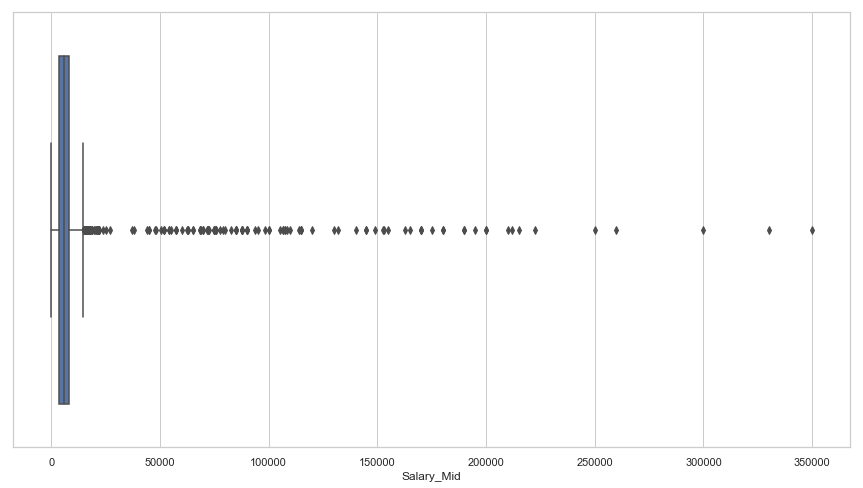

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=df["Salary_Mid"])

In [23]:
# Let's see which jobs are the outliers.
df

Company  \
0                        MONEYSMART SINGAPORE PTE. LTD.   
1                                    PORTCAST PTE. LTD.   
2                      SINGAPORE PRESS HOLDINGS LIMITED   
4         AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
5                           JOHNSON & JOHNSON PTE. LTD.   
6                   JABIL CIRCUIT (SINGAPORE) PTE. LTD.   
7                              ADECCO PERSONNEL PTE LTD   
8                 OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
10                        ECQUARIA TECHNOLOGIES PTE LTD   
11        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
12                                    MACLINK PTE. LTD.   
13                                   ITCAN PTE. LIMITED   
14                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
15                DIMENSION DATA ASIA PACIFIC PTE. LTD.   
16                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
17                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
18                         NTT DATA SINGAPORE PTE. LTD.   
19                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
20                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
21                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
22                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
23                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
24                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
25                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
26                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
27                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
28                 DIMENSION DATA (SINGAPORE) PTE. LTD.   
30                      HEINEKEN ASIA PACIFIC PTE. LTD.   
31          DREAMSCAPE NETWORKS INTERNATIONAL PTE. LTD.   
32                           LEADIQ SINGAPORE PTE. LTD.   
...                                                 ...   
4530  EQUATORIAL MARINE FUEL MANAGEMENT SERVICES PTE...   
4531                      SYSMEX ASIA PACIFIC PTE. LTD.   
4537                  THE SUPREME HR ADVISORY PTE. LTD.   
4538                          IKIGAI ENABLERS PTE. LTD.   
4539                              HEALTHBEATS PTE. LTD.   
4540  NETWORK FOR ELECTRONIC TRANSFERS (SINGAPORE) P...   
4542         WINTECH NANO-TECHNOLOGY SERVICES PTE. LTD.   
4543                                        M1 NET LTD.   
4544                                         M1 LIMITED   
4545                          THE TORONTO-DOMINION BANK   
4547                     N3 RESULTS SINGAPORE PTE. LTD.   
4549                                 OAKTREE CONSULTING   
4550                                    MENCK PTE. LTD.   
4551                        MIT SEMICONDUCTOR PTE. LTD.   
4553                  CONNECT ENERGY SERVICES PTE. LTD.   
4554                            HMLET CENTRAL PTE. LTD.   
4555                  THE SUPREME HR ADVISORY PTE. LTD.   
4556                      GOOGLE ASIA PACIFIC PTE. LTD.   
4557                  THE SUPREME HR ADVISORY PTE. LTD.   
4558                          MEDS TECHNOLOGIES PTE LTD   
4559           BUSINESS EDGE PERSONNEL SERVICES PTE LTD   
4560                                      NCS PTE. LTD.   
4561                                      TVI PTE. LTD.   
4562                       COURTS (SINGAPORE) PTE. LTD.   
4563                      SCHAWK ASIA PACIFIC PTE. LTD.   
4564                              D L RESOURCES PTE LTD   
4566                              D L RESOURCES PTE LTD   
4567                              D L RESOURCES PTE LTD   
4568                           RH SYNERGY (S) PTE. LTD.   
4576                                COMPANY UNDISCLOSED   

                                                  Title                  Type  \
0                                         Data Engineer             Full Time   
1                                        Data Scientist             Full Time   
2                           Data Visualisation Designer             Permanent   
4         Data Center Engineering Project Engineer APAC          

In [24]:
# Let's sift out the data from non-data jobs.
df = df[df['Title'].str.contains("Data|data|Analytics|Business Intelligence|Analyst|analyst")==True]
df.shape

(550, 16)

In [25]:
df

Company  \
0                      MONEYSMART SINGAPORE PTE. LTD.   
1                                  PORTCAST PTE. LTD.   
2                    SINGAPORE PRESS HOLDINGS LIMITED   
4       AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
5                         JOHNSON & JOHNSON PTE. LTD.   
6                 JABIL CIRCUIT (SINGAPORE) PTE. LTD.   
7                            ADECCO PERSONNEL PTE LTD   
8               OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
10                      ECQUARIA TECHNOLOGIES PTE LTD   
11      AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
12                                  MACLINK PTE. LTD.   
13                                 ITCAN PTE. LIMITED   
31        DREAMSCAPE NETWORKS INTERNATIONAL PTE. LTD.   
43                            STANDARD CHARTERED BANK   
60    JONES LANG LASALLE PROPERTY CONSULTANTS PTE LTD   
67                                  TOSS-EX PTE. LTD.   
69               KELLY SERVICES (SINGAPORE) PTE. LTD.   
70               KELLY SERVICES (SINGAPORE) PTE. LTD.   
84                  R SYSTEMS (SINGAPORE) PTE LIMITED   
94                            STANDARD CHARTERED BANK   
100                               SOLDERFIELD PTE LTD   
109                                     DBS BANK LTD.   
119               S&P GLOBAL ASIAN HOLDINGS PTE. LTD.   
133                                     DBS BANK LTD.   
168                 R SYSTEMS (SINGAPORE) PTE LIMITED   
184                     GOOGLE ASIA PACIFIC PTE. LTD.   
185                              TRAKOMATIC PTE. LTD.   
187                         INTELLECT MINDS PTE. LTD.   
189                               GUMI ASIA PTE. LTD.   
190                                     DBS BANK LTD.   
...                                               ...   
4301                    GOOGLE ASIA PACIFIC PTE. LTD.   
4302                 LAZADA SOUTH EAST ASIA PTE. LTD.   
4303                         CPM CONSULTING PTE. LTD.   
4304                 SMARTKARMA INNOVATIONS PTE. LTD.   
4305       EASTSPRING INVESTMENTS (SINGAPORE) LIMITED   
4309                                BOROUGE PTE. LTD.   
4311                              HCL INSYS PTE. LTD.   
4359            OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
4360            OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
4362            OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
4377                           SEPHORA ASIA PTE. LTD.   
4390                        IKIGAI ENABLERS PTE. LTD.   
4397                  ASPIRE GLOBAL NETWORK PTE. LTD.   
4440                                   APBA PTE. LTD.   
4442         EUROMONITOR INTERNATIONAL (ASIA) PTE LTD   
4463                     REVINATE SINGAPORE PTE. LTD.   
4465                     OFFICE SECRETARIES PTE. LTD.   
4466                 PETER KLARE CONSULTING PTE. LTD.   
4470                                    ERP21 PTE LTD   
4481                    GOOGLE ASIA PACIFIC PTE. LTD.   
4482                     AVENSYS CONSULTING PTE. LTD.   
4483                    GOOGLE ASIA PACIFIC PTE. LTD.   
4484                THE SUPREME HR ADVISORY PTE. LTD.   
4485                        AEROSPEC SUPPLIES PTE LTD   
4486                               ONEASTON PTE. LTD.   
4491                   GOLDMAN SACHS (SINGAPORE) PTE.   
4493                              TITANSOFT PTE. LTD.   
4495                    GOLDMAN SACHS FUTURES PTE LTD   
4506                                    ERP21 PTE LTD   
4511     GOLDMAN SACHS SERVICES (SINGAPORE) PTE. LTD.   

                                                  Title  \
0                                         Data Engineer   
1                                        Data Scientist   
2                           Data Visualisation Designer   
4         Data Center Engineering Project Engineer APAC   
5                             Lead Data Center Engineer   
6                    Data Scientist - Intern (6 months)   
7                                         Data Engineer   
8             Data Center Fiber Optics 

- There are still outliers, but not as many as the previous plot.
- We'll include them in our analysis as they are only a few.

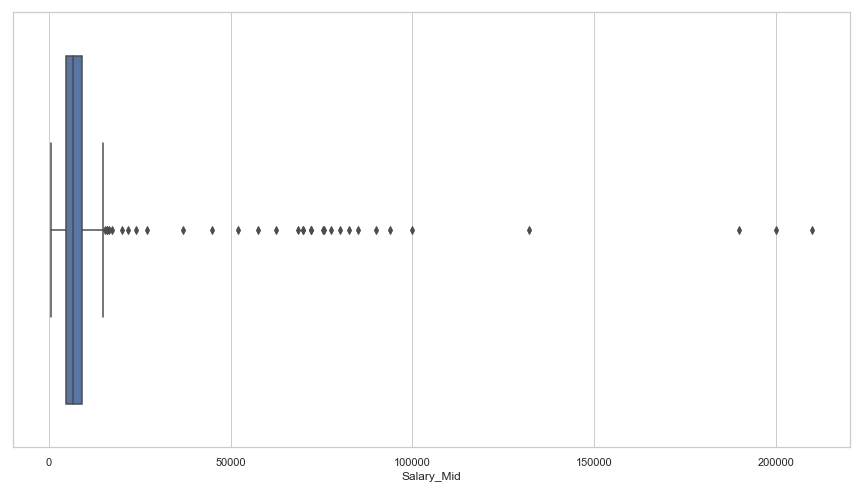

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=df["Salary_Mid"])

In [27]:
pd.options.display.max_rows=2000
df.sort_values(by=['Salary_Mid'], ascending = False)

Company  \
2195                 ROBERT WALTERS (SINGAPORE) PTE LTD   
393                                              UBS AG   
2863      AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED   
1288                                INFOCEPTS PTE. LTD.   
403                         SPOTIFY SINGAPORE PTE. LTD.   
2706                      CISCO SYSTEMS (USA) PTE. LTD.   
1257                                  BIGTAPP PTE. LTD.   
954                                 MAKO APAC PTE. LTD.   
2155                      ORICA INTERNATIONAL PTE. LTD.   
2866                      BLOOMBERG SINGAPORE PTE. LTD.   
252                   DHL EXPRESS (SINGAPORE) PTE. LTD.   
412       TURNER BROADCASTING SALES SOUTHEAST ASIA, INC   
3295                       SABRE ASIA PACIFIC PTE. LTD.   
2701                      CISCO SYSTEMS (USA) PTE. LTD.   
2192                  STONE FOREST ACCOUNTSERVE PTE LTD   
2646  THE HONGKONG AND SHANGHAI BANKING CORPORATION ...   
2956                      BLOOMBERG SINGAPORE PTE. LTD.   
1037                      CISCO SYSTEMS (USA) PTE. LTD.   
3285         DTCC DATA REPOSITORY (SINGAPORE) PTE. LTD.   
734            MUFG FUND SERVICES (SINGAPORE) PTE. LTD.   
3762           MUFG FUND SERVICES (SINGAPORE) PTE. LTD.   
1387                                      NCS PTE. LTD.   
4304                   SMARTKARMA INNOVATIONS PTE. LTD.   
396                            NOMURA SINGAPORE LIMITED   
1034                  MASTERCARD ASIA/PACIFIC PTE. LTD.   
4483                      GOOGLE ASIA PACIFIC PTE. LTD.   
853       AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED   
692                     ICON CONSULTING-GROUP PTE. LTD.   
4301                      GOOGLE ASIA PACIFIC PTE. LTD.   
1445                      GOOGLE ASIA PACIFIC PTE. LTD.   
1734             OFFICE PRODUCTIVITY SOLUTION PTE. LTD.   
11        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
3268                      GOOGLE ASIA PACIFIC PTE. LTD.   
3066                                COMPANY UNDISCLOSED   
3270                                      DBS BANK LTD.   
2613                                 LEAP (G) PTE. LTD.   
2886                                      DBS BANK LTD.   
1773                                      DBS BANK LTD.   
3269                                      DBS BANK LTD.   
3266                                      DBS BANK LTD.   
2396                                      DBS BANK LTD.   
3264                         OPEN TEXT (ASIA) PTE. LTD.   
3067                                COMPANY UNDISCLOSED   
1442                DELL GLOBAL B.V. (SINGAPORE BRANCH)   
404                             STANDARD CHARTERED BANK   
1466                             HOOQ DIGITAL PTE. LTD.   
2830                          G2 COMTECH ASIA PTE. LTD.   
746                  THAKRAL BROTHERS (PRIVATE) LIMITED   
1965  ORACLE CAPAC SERVICES UNLIMITED COMPANY (SINGA...   
582                                 COMPANY UNDISCLOSED   
1483                            RECRUIT EXPRESS PTE LTD   
2185                            STANDARD CHARTERED BANK   
2614                                 LEAP (G) PTE. LTD.   
4098                               NES GLOBAL PTE. LTD.   
43                              STANDARD CHARTERED BANK   
1251                                      DBS BANK LTD.   
1725                ASTELLAS PHARMA SINGAPORE PTE. LTD.   
3914                              RESMED ASIA PTE. LTD.   
2870                   ERNST & YOUNG ADVISORY PTE. LTD.   
1439                DELL GLOBAL B.V. (SINGAPORE BRANCH)   
2869                   ERNST & YOUNG ADVISORY PTE. LTD.   
394                    ERNST & YOUNG ADVISORY PTE. LTD.   
2880                   ERNST & YOUNG ADVISORY PTE. LTD.   
205                         KEYTEO CONSULTING PTE. LTD.   
3666                       TRAVELOKA SERVICES PTE. LTD.   
184                       GOOGLE ASIA PACIFIC PTE. LTD.   
3672                    SCIENTE INTERNATIONAL PTE. LTD.   
202                    LAZADA SOUTH 

### Feature Engineer High/Low Salary
- The median of Salary_Mid will be used to create the two labels.
- Anything greater than $6500 will be considered high salary.

In [28]:
df.describe()

Salary_Min     Salary_Max     Salary_Mid    Post_Year  Post_Month  \
count     550.000000     550.000000     550.000000   550.000000  550.000000   
mean     8338.136364   12622.567273   10480.351818  2018.980000    1.220000   
std     16672.279845   22892.856818   19617.013682     0.140127    1.541402   
min        20.000000     800.000000     650.000000  2018.000000    1.000000   
25%      3750.000000    6000.000000    4750.000000  2019.000000    1.000000   
50%      5000.000000    8000.000000    6500.000000  2019.000000    1.000000   
75%      7000.000000   11000.000000    9000.000000  2019.000000    1.000000   
max    200000.000000  250000.000000  210000.000000  2019.000000   12.000000   

       Expiry_Year  Expiry_Month  
count        550.0    550.000000  
mean        2019.0      2.001818  
std            0.0      0.279859  
min         2019.0      1.000000  
25%         2019.0      2.000000  
50%         2019.0      2.000000  
75%         2019.0      2.000000  
max         2019.0      3.000000

In [29]:
subset_high = df[df.loc[:, 'Salary_Mid'] >= 6500]
subset_high.sort_values(by=['Salary_Mid'], ascending = False)
subset_high["Salary_High"] = 1
subset_high.head()

/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Company  \
4   AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
5                     JOHNSON & JOHNSON PTE. LTD.   
7                        ADECCO PERSONNEL PTE LTD   
11  AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
43                        STANDARD CHARTERED BANK   

                                                Title                 Type  \
4       Data Center Engineering Project Engineer APAC            Full Time   
5                           Lead Data Center Engineer            Permanent   
7                                       Data Engineer  Contract, Full Time   
11  Senior Data Center Infrastructure Availability...            Full Time   
43                                   Business Analyst            Full Time   

                Seniority                                           Category  \
4            Professional                                Design, Engineering   
5            Professional                Engineering, Information Technology   
7               Executive                             Information Technology   
11           Professional  Building and Construction, Design, Engineering...   
43  Manager, Professional                                Banking and Finance   

   Num_Applications                                        Description  \
4                0   The Data Center Global Services (DCGS) team is...   
5                0   The role of Lead Data Center Engineer is owner...   
7                0   The Opportunity\nOur client is an established ...   
11              10   Amazon Web Service (AWS) operates 44 Availabil...   
43               0   About Standard Chartered \nWe are a leading in...   

                                         Requirements  Salary_Min  Salary_Max  \
4   Basic Qualifications -\nMinimum 5 years of mis...      9000.0     12000.0   
5   Required Minimum Education:  Bachelor’s Degree...      5000.0     10000.0   
7   The Talent\nMinimum of 3 - 5 years of relevant...      5000.0      8500.0   
11  BASIC QUALIFICATIONS\nBachelor’s/Diploma/certi...     14000.0     17000.0   
43  Ideal Candidate:\nShould have around 10 years ...      8300.0     16600.0   

    Salary_Mid Postal_Code  Post_Year  Post_Month  Expiry_Year  Expiry_Month  \
4      10500.0      048542       2019           1         2019             3   
5       7500.0      118222       2019           1         2019             3   
7       6750.0      228208       2019           1         2019             3   
11     15500.0      048542       2019           1         2019             3   
43     12450.0      018981       2019           1         2019             2   

    Salary_High  
4             1  
5             1  
7             1  
11            1  
43            1

In [30]:
subset_low = df[df.loc[:, 'Salary_Mid'] < 6500]
subset_low.sort_values(by=['Salary_Mid'], ascending = False)
subset_low["Salary_Low"] = 0
subset_low.head()

/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Company  \
0         MONEYSMART SINGAPORE PTE. LTD.   
1                     PORTCAST PTE. LTD.   
2       SINGAPORE PRESS HOLDINGS LIMITED   
6    JABIL CIRCUIT (SINGAPORE) PTE. LTD.   
8  OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   

                                       Title                 Type  \
0                              Data Engineer            Full Time   
1                             Data Scientist            Full Time   
2                Data Visualisation Designer            Permanent   
6         Data Scientist - Intern (6 months)           Internship   
8  Data Center Fiber Optics Cabling Engineer  Contract, Full Time   

           Seniority                                       Category  \
0          Executive                         Information Technology   
1  Middle Management                                    Engineering   
2   Junior Executive                                         Design   
6  Fresh/entry level  Information Technology, Manufacturing, Others   
8      Non-executive                         Information Technology   

  Num_Applications                                        Description  \
0               0   Mission\nAs part of becoming one of the member...   
1               0   In this role, you will be responsible for anal...   
2               2   Digital arm of English, Malay, Tamil MediaGrou...   
6               2   Essential Duties & Responsibilities\nAnalyse r...   
8               0   Company UEN: 199700895N\n(Long term employment...   

                                        Requirements  Salary_Min  Salary_Max  \
0  Competencies\nDegree in Computer Science or an...      5000.0      7000.0   
1  ●  Comfortable working with large amounts of d...      2200.0      6000.0   
2  Prior experience in a data visualization role\...      3500.0      4500.0   
6  Education & Experience Requirements\nAdvanced ...       800.0      1500.0   
8  Urgent & Immediate Position.\nMust have fiber ...      3000.0      5000.0   

   Salary_Mid Postal_Code  Post_Year  Post_Month  Expiry_Year  Expiry_Month  \
0      6000.0      149555       2019           1         2019             3   
1      4100.0      059911       2019           1         2019             3   
2      4000.0      318994       2019           1         2019             3   
6      1150.0      528604       2019           1         2019             3   
8      4000.0      486025       2019           1         2019             3   

   Salary_Low  
0           0  
1           0  
2           0  
6           0  
8           0

In [31]:
df = pd.merge(subset_high, subset_low, how='outer')
df

Company  \
0        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
1                          JOHNSON & JOHNSON PTE. LTD.   
2                             ADECCO PERSONNEL PTE LTD   
3        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
4                              STANDARD CHARTERED BANK   
5                 KELLY SERVICES (SINGAPORE) PTE. LTD.   
6                 KELLY SERVICES (SINGAPORE) PTE. LTD.   
7                              STANDARD CHARTERED BANK   
8                  S&P GLOBAL ASIAN HOLDINGS PTE. LTD.   
9                    R SYSTEMS (SINGAPORE) PTE LIMITED   
10                       GOOGLE ASIA PACIFIC PTE. LTD.   
11                                       DBS BANK LTD.   
12                              NIOMETRICS (PTE.) LTD.   
13                              NIOMETRICS (PTE.) LTD.   
14                                     REDMART LIMITED   
15                          JEWEL PAYMENTECH PTE. LTD.   
16                    LAZADA SOUTH EAST ASIA PTE. LTD.   
17            RGF TALENT SOLUTIONS SINGAPORE PTE. LTD.   
18                         KEYTEO CONSULTING PTE. LTD.   
19                              NIOMETRICS (PTE.) LTD.   
20                   DHL EXPRESS (SINGAPORE) PTE. LTD.   
21                                 COMPANY UNDISCLOSED   
22                             SINGAPORE POWER LIMITED   
23                              TBWA SINGAPORE PTE LTD   
24                            FIXED & MOBILE PTE. LTD.   
25                                              UBS AG   
26                    ERNST & YOUNG ADVISORY PTE. LTD.   
27                            LYNX ANALYTICS PTE. LTD.   
28                            NOMURA SINGAPORE LIMITED   
29                          RUBICOR GROUP PTE. LIMITED   
30                       DELOITTE CONSULTING PTE. LTD.   
31                     SCIENTE INTERNATIONAL PTE. LTD.   
32                                 SAKSOFT PTE LIMITED   
33                         SPOTIFY SINGAPORE PTE. LTD.   
34                             STANDARD CHARTERED BANK   
35            RGF TALENT SOLUTIONS SINGAPORE PTE. LTD.   
36       TURNER BROADCASTING SALES SOUTHEAST ASIA, INC   
37                                       DBS BANK LTD.   
38                                       DBS BANK LTD.   
39                   VIRTUSA SINGAPORE PRIVATE LIMITED   
40               OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
41                      TOTAL EBIZ SOLUTIONS PTE. LTD.   
42                             STANDARD CHARTERED BANK   
43               OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
44               OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
45                                 COMPANY UNDISCLOSED   
46                      TERADATA (SINGAPORE) PTE. LTD.   
47                           SCHELLDEN GLOBAL SERVICES   
48                          SCHELLDEN GLOBAL PTE. LTD.   
49                    ERNST & YOUNG ADVISORY PTE. LTD.   
50                    ERNST & YOUNG ADVISORY PTE. LTD.   
51      HEWLETT PACKARD ENTERPRISE SINGAPORE PTE. LTD.   
52                                 SMARTSOFT PTE. LTD.   
53                           SCHELLDEN GLOBAL SERVICES   
54                          SCHELLDEN GLOBAL PTE. LTD.   
55                       CAPGEMINI SINGAPORE PTE. LTD.   
56                        NTT DATA SINGAPORE PTE. LTD.   
57                     ICON CONSULTING-GROUP PTE. LTD.   
58                        INFOSYS CONSULTING PTE. LTD.   
59            MUFG FUND SERVICES (SINGAPORE) PTE. LTD.   
60                  THAKRAL BROTHERS (PRIVATE) LIMITED   
61                        INFOSYS CONSULTING PTE. LTD.   
62                        INFOSYS CONSULTING PTE. LTD.   
63            TECHCOM SOLUTIONS ASIA PACIFIC PTE. LTD.   
64       AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED   
65                               U3 INFOTECH PTE. LTD.   
66                        SANDBOX CONSULTING PTE. LTD.   
67                    EIRE SYSTEMS SINGAPORE PTE. LTD.   
68                                 MAKO APAC 

In [32]:
df['Salary_High'] = df['Salary_High'].fillna(0)

# Remove the unneccesary column.
df.drop('Salary_Low', axis=1, inplace=True)
df

Company  \
0        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
1                          JOHNSON & JOHNSON PTE. LTD.   
2                             ADECCO PERSONNEL PTE LTD   
3        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
4                              STANDARD CHARTERED BANK   
5                 KELLY SERVICES (SINGAPORE) PTE. LTD.   
6                 KELLY SERVICES (SINGAPORE) PTE. LTD.   
7                              STANDARD CHARTERED BANK   
8                  S&P GLOBAL ASIAN HOLDINGS PTE. LTD.   
9                    R SYSTEMS (SINGAPORE) PTE LIMITED   
10                       GOOGLE ASIA PACIFIC PTE. LTD.   
11                                       DBS BANK LTD.   
12                              NIOMETRICS (PTE.) LTD.   
13                              NIOMETRICS (PTE.) LTD.   
14                                     REDMART LIMITED   
15                          JEWEL PAYMENTECH PTE. LTD.   
16                    LAZADA SOUTH EAST ASIA PTE. LTD.   
17            RGF TALENT SOLUTIONS SINGAPORE PTE. LTD.   
18                         KEYTEO CONSULTING PTE. LTD.   
19                              NIOMETRICS (PTE.) LTD.   
20                   DHL EXPRESS (SINGAPORE) PTE. LTD.   
21                                 COMPANY UNDISCLOSED   
22                             SINGAPORE POWER LIMITED   
23                              TBWA SINGAPORE PTE LTD   
24                            FIXED & MOBILE PTE. LTD.   
25                                              UBS AG   
26                    ERNST & YOUNG ADVISORY PTE. LTD.   
27                            LYNX ANALYTICS PTE. LTD.   
28                            NOMURA SINGAPORE LIMITED   
29                          RUBICOR GROUP PTE. LIMITED   
30                       DELOITTE CONSULTING PTE. LTD.   
31                     SCIENTE INTERNATIONAL PTE. LTD.   
32                                 SAKSOFT PTE LIMITED   
33                         SPOTIFY SINGAPORE PTE. LTD.   
34                             STANDARD CHARTERED BANK   
35            RGF TALENT SOLUTIONS SINGAPORE PTE. LTD.   
36       TURNER BROADCASTING SALES SOUTHEAST ASIA, INC   
37                                       DBS BANK LTD.   
38                                       DBS BANK LTD.   
39                   VIRTUSA SINGAPORE PRIVATE LIMITED   
40               OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
41                      TOTAL EBIZ SOLUTIONS PTE. LTD.   
42                             STANDARD CHARTERED BANK   
43               OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
44               OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
45                                 COMPANY UNDISCLOSED   
46                      TERADATA (SINGAPORE) PTE. LTD.   
47                           SCHELLDEN GLOBAL SERVICES   
48                          SCHELLDEN GLOBAL PTE. LTD.   
49                    ERNST & YOUNG ADVISORY PTE. LTD.   
50                    ERNST & YOUNG ADVISORY PTE. LTD.   
51      HEWLETT PACKARD ENTERPRISE SINGAPORE PTE. LTD.   
52                                 SMARTSOFT PTE. LTD.   
53                           SCHELLDEN GLOBAL SERVICES   
54                          SCHELLDEN GLOBAL PTE. LTD.   
55                       CAPGEMINI SINGAPORE PTE. LTD.   
56                        NTT DATA SINGAPORE PTE. LTD.   
57                     ICON CONSULTING-GROUP PTE. LTD.   
58                        INFOSYS CONSULTING PTE. LTD.   
59            MUFG FUND SERVICES (SINGAPORE) PTE. LTD.   
60                  THAKRAL BROTHERS (PRIVATE) LIMITED   
61                        INFOSYS CONSULTING PTE. LTD.   
62                        INFOSYS CONSULTING PTE. LTD.   
63            TECHCOM SOLUTIONS ASIA PACIFIC PTE. LTD.   
64       AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED   
65                               U3 INFOTECH PTE. LTD.   
66                        SANDBOX CONSULTING PTE. LTD.   
67                    EIRE SYSTEMS SINGAPORE PTE. LTD.   
68                                 MAKO APAC 

### Get Dummies

- Let's get dummies for the categorical variables.

In [33]:
# Get dummies for the following features.
dummies = pd.get_dummies(df[["Company", "Title", "Type", "Seniority", "Category", "Postal_Code"]], drop_first = True)


In [34]:
dummies.shape


(550, 1021)

In [35]:
# Merge the DataFrame result back onto the original dataframe.
df_1 = df.merge(dummies, left_index = True, right_index = True,how = 'outer')

In [36]:
# We can now drop the original/irrelevant columns.
df_1.drop(["Company", "Title", "Type", "Seniority", "Category", "Postal_Code"], axis = 1, inplace = True)

# We will also drop the two columns as they are irrelevant.
df_1.drop(["Description", "Requirements", "Salary_Max", "Salary_Min", "Salary_Mid"], axis = 1, inplace = True)


In [37]:
df_1.shape

(550, 1027)

### Feature Selection

Let's use the `SelectKBest` method to see which are the top 10 features. Also load the `f_classif` and `chi2` functions, which will be our metrics to evaluate what makes a variable the "best."


- What are the top five features for `X` using `f_classif` and `chi2`?

In [38]:
# This list of column names will come in handy later.
cols = list(df_1.columns)
cols.remove('Salary_High')

X = df_1[cols]
y = df.Salary_High.values

In [39]:
# Build the selector — we'll build one with each score type
skb_f = SelectKBest(f_classif, k=10)
skb_chi2 = SelectKBest(chi2, k=10)

# Train the selector on the data
skb_f.fit(X, y)
skb_chi2.fit(X, y)

# Examine the results (sorted according to f_classif)
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)

kbest

/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [3] are constant.
  UserWarning)
/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


feature   f_classif  \
744                         Seniority_Senior Management     22.4856   
726                                   Seniority_Manager      15.476   
700                            Type_Contract, Full Time     13.0758   
701                                      Type_Full Time     11.2459   
724                          Seniority_Junior Executive     10.9677   
820                                  Postal_Code_018981     8.82631   
821                                  Postal_Code_018982     8.00338   
752                        Category_Admin / Secretarial      7.9356   
173   Company_MANPOWER STAFFING SERVICES (SINGAPORE)...      7.4672   
77                                Company_DBS BANK LTD.     7.19975   
738                              Seniority_Professional     6.95001   
443                              Title_Data Entry Clerk     6.77527   
718                         Seniority_Fresh/entry level     6.60525   
823                                  Postal_Code_018989     6.45516   
742            Seniority_Professional, Senior Executive     6.45516   
887                                  Postal_Code_079120     6.45516   
792                     Category_Information Technology     5.95409   
791                            Category_Human Resources     5.62401   
859                                  Postal_Code_059811     5.62401   
285                         Company_TITANSOFT PTE. LTD.     5.62401   
462                                Title_Data Scientist        5.12   
265                     Company_STANDARD CHARTERED BANK     4.87202   
888                                  Postal_Code_079903     4.68414   
438                                 Title_Data Engineer      4.5997   
544                           Title_Lead Data Scientist     4.57836   
931                                  Postal_Code_179803      4.4817   
982                                  Postal_Code_409015      4.4817   
150                          Company_ITCAN PTE. LIMITED      4.4817   
846                                  Postal_Code_049246      4.4817   
856                                  Postal_Code_049909     4.34495   
406                                  Title_Data Analyst     4.34495   
116               Company_GOOGLE ASIA PACIFIC PTE. LTD.     3.99225   
884                                  Postal_Code_078881     3.74476   
70                     Company_CPM CONSULTING PTE. LTD.     3.64984   
459                       Title_Data Science Consultant     3.64984   
156   Company_JONES LANG LASALLE PROPERTY CONSULTANT...     3.34825   
983                                  Postal_Code_409051     3.34825   
721          Seniority_Fresh/entry level, Non-executive     3.34825   
308            Company_ZALORA SOUTH EAST ASIA PTE. LTD.     3.34825   
352        Title_Associate, Advisory Data and Analytics     3.34825   
712                            Type_Temporary, Contract     3.34825   
110        Company_GMP RECRUITMENT SERVICES (S) PTE LTD     3.34825   
357                        Title_Big Data Administrator     3.34825   
423                          Title_Data Center Operator     3.34825   
909                                  Postal_Code_119228     3.34825   
940                                  Postal_Code_198785     3.34825   
183   Company_NATIONAL UNIVERSITY HEALTH SYSTEM PTE....     3.34825   
198   Company_OBSERVATIONAL AND PRAGMATIC RESEARCH I...     3.34825   
961                                  Postal_Code_318994     3.34825   
281           Company_THE SUPREME HR ADVISORY PTE. LTD.     3.34825   
277                 Company_THATZ INTERNATIONAL PTE LTD     3.34825   
840                                  Postal_Code_048623     3.34825   
725        Seniority_Junior Executive, Senior Executive     3.34825   
66                          Company_COMPANY UNDISCLOSED     3.13475   
717               Seniority_Executive, Senior Executive     2.87973   
736                             Seniority_Non-executive     2.75842   
9

In [40]:
# Examine the results (sorted according to chi2)
kbest2 = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('chi2 score', ascending=False)

kbest2

feature   f_classif  \
744                         Seniority_Senior Management     22.4856   
726                                   Seniority_Manager      15.476   
700                            Type_Contract, Full Time     13.0758   
724                          Seniority_Junior Executive     10.9677   
820                                  Postal_Code_018981     8.82631   
752                        Category_Admin / Secretarial      7.9356   
821                                  Postal_Code_018982     8.00338   
173   Company_MANPOWER STAFFING SERVICES (SINGAPORE)...      7.4672   
701                                      Type_Full Time     11.2459   
0                                      Num_Applications    0.456105   
77                                Company_DBS BANK LTD.     7.19975   
443                              Title_Data Entry Clerk     6.77527   
718                         Seniority_Fresh/entry level     6.60525   
742            Seniority_Professional, Senior Executive     6.45516   
823                                  Postal_Code_018989     6.45516   
887                                  Postal_Code_079120     6.45516   
285                         Company_TITANSOFT PTE. LTD.     5.62401   
859                                  Postal_Code_059811     5.62401   
791                            Category_Human Resources     5.62401   
738                              Seniority_Professional     6.95001   
462                                Title_Data Scientist        5.12   
265                     Company_STANDARD CHARTERED BANK     4.87202   
888                                  Postal_Code_079903     4.68414   
544                           Title_Lead Data Scientist     4.57836   
982                                  Postal_Code_409015      4.4817   
931                                  Postal_Code_179803      4.4817   
846                                  Postal_Code_049246      4.4817   
150                          Company_ITCAN PTE. LIMITED      4.4817   
438                                 Title_Data Engineer      4.5997   
856                                  Postal_Code_049909     4.34495   
406                                  Title_Data Analyst     4.34495   
116               Company_GOOGLE ASIA PACIFIC PTE. LTD.     3.99225   
884                                  Postal_Code_078881     3.74476   
459                       Title_Data Science Consultant     3.64984   
70                     Company_CPM CONSULTING PTE. LTD.     3.64984   
961                                  Postal_Code_318994     3.34825   
110        Company_GMP RECRUITMENT SERVICES (S) PTE LTD     3.34825   
156   Company_JONES LANG LASALLE PROPERTY CONSULTANT...     3.34825   
940                                  Postal_Code_198785     3.34825   
183   Company_NATIONAL UNIVERSITY HEALTH SYSTEM PTE....     3.34825   
840                                  Postal_Code_048623     3.34825   
909                                  Postal_Code_119228     3.34825   
198   Company_OBSERVATIONAL AND PRAGMATIC RESEARCH I...     3.34825   
352        Title_Associate, Advisory Data and Analytics     3.34825   
721          Seniority_Fresh/entry level, Non-executive     3.34825   
712                            Type_Temporary, Contract     3.34825   
277                 Company_THATZ INTERNATIONAL PTE LTD     3.34825   
281           Company_THE SUPREME HR ADVISORY PTE. LTD.     3.34825   
983                                  Postal_Code_409051     3.34825   
423                          Title_Data Center Operator     3.34825   
725        Seniority_Junior Executive, Senior Executive     3.34825   
308            Company_ZALORA SOUTH EAST ASIA PTE. LTD.     3.34825   
357                        Title_Big Data Administrator     3.34825   
66                          Company_COMPANY UNDISCLOSED     3.13475   
792                     Category_Information Technology     5.95409   
717               Seniority_Executive, Senior Executive     2.87973   
8

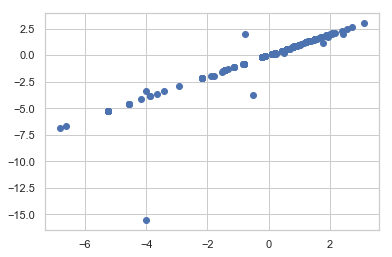

In [41]:
plt.scatter([np.log(x) for x in kbest['f_classif']],
            [np.log(x) for x in kbest['chi2 score']])

- The results from feature selection using both tests were more or less the same.
- We will use the top 10 features from the F-test for modelling.

In [42]:
X = df_1[["Seniority_Senior Management", "Seniority_Manager", "Type_Contract, Full Time",
          "Type_Full Time", "Seniority_Junior Executive",
          "Postal_Code_018981", "Postal_Code_018982", "Category_Admin / Secretarial",
          "Company_MANPOWER STAFFING SERVICES (SINGAPORE) PTE LTD", "Company_DBS BANK LTD."]]
y = df_1['Salary_High']

In [43]:
ss = StandardScaler()
Xn = ss.fit_transform(X)

/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [44]:
# This is our baseline accuracy.
# Note that there isn't a severe class imbalance between the two labels.
y.value_counts() / len(y)

1.0    0.525455
0.0    0.474545
Name: Salary_High, dtype: float64

### SVM

Let's use the `SVM` for our first classification model.


- Which kernal is best for our model?
- If it is not performing well, is there any way to optimize it?


> We use SVM for the following reasons:
- Exceptional perfomance (historically widely used)
- Low risk of overfitting
- Robust to outliers

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

- The scores across all the kernals are roughly the same.
- Even though poly scored the highest, we will stick to linear as we want to print the coefficients and its corresponding features.

>There is attribute coef_ for SVM classifier but it only works for SVM with linear kernel. For other kernels it is not possible because data are transformed by kernel method to another space, which is not related to input space,

In [46]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svm = SVC(kernel=kernel, degree=3)
    scores = cross_val_score(svm, Xn, y, cv=5, scoring='roc_auc')
    sm = scores.mean()
    ss = scores.std()
    print("{} - Average score: {:0.3} +/- {:0.3}".format(kernel,sm, ss))

/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sufyanahmad/anaconda3/lib/pyth

linear - Average score: 0.645 +/- 0.0333
poly - Average score: 0.672 +/- 0.0209
rbf - Average score: 0.633 +/- 0.0329
sigmoid - Average score: 0.67 +/- 0.0112


In [47]:
# # Print confusion matrix and classification report.
# def print_cm_cr(y_true, y_pred):
#     confusion = pd.crosstab(y_true, 
#                             y_pred, 
#                             rownames=['Actual'], 
#                             colnames=['Predicted'], 
#                             margins=True)
#     print(confusion)
#     print('')
#     print(classification_report(y_true, y_pred))

In [48]:
svm = SVC(kernel='linear', probability = True)

X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.2, random_state = 40)

svm.fit(X_train, y_train)

# # Print confusion matrix and F1 score.
# y_pred_svm = svm.predict(X_test)
# print_cm_cr(y_test, y_pred_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [49]:
# Predictions and probabilities.
yhat = svm.predict(X_test)
yhat_pp_svm = svm.predict_proba(X_test)

# print("yhat:", yhat)
# print("y predict proba:", yhat_pp_svm)

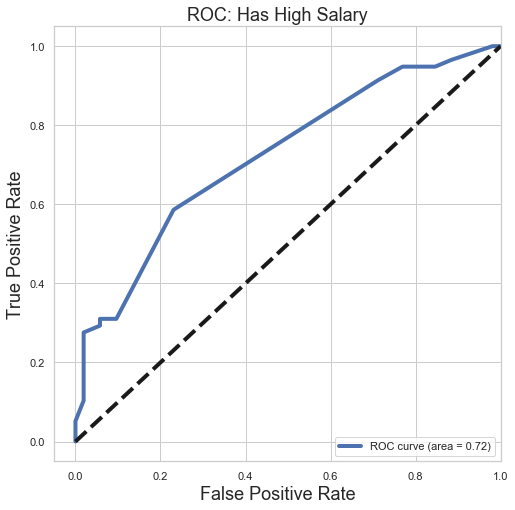

In [50]:
# Let's eveluate the model with ROC curve.
fpr_svm, tpr_svm, _ = roc_curve(y_test, yhat_pp_svm[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=[8,8])
plt.plot(fpr_svm, tpr_svm, label='ROC curve (area = %0.2f)' % roc_auc_svm, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC: Has High Salary', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### Decision Tree

Let's use the `Decision Tree` for our next classification model.


- We should search for the best hyperparameters to optimize our model.
- How big do we want the tree to be (max depth)?


> We use Decision Tree for the following reasons:
- Have a feel of it vs ensemble methods such as Random Forest (which we will model it later).
- Decision trees implicitly perform variable screening or feature selection and ranks the most important features.

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Find the best parameters with Gridsearch.
dtc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

dtc_gs = GridSearchCV(DecisionTreeClassifier(), 
                      dtc_params, 
                      cv=5, 
                      verbose=1, 
                      scoring='roc_auc', 
                      n_jobs=-1)

# Use the Gridsearch model to fit the data.
dtc_gs.fit(X, y)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:    9.1s finished
/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [53]:
# Print the best parameters.
dtc_best = dtc_gs.best_estimator_
print(dtc_gs.best_params_)
print(dtc_gs.best_score_)

{'max_depth': None, 'max_features': 2, 'min_samples_split': 30}
0.6864625812384605


In [54]:
# # Print confusion matrix and F1 score.
# y_pred_dtc_gs = dtc_gs.predict(X_test)
# print_cm_cr(y_test, y_pred_dtc_gs)

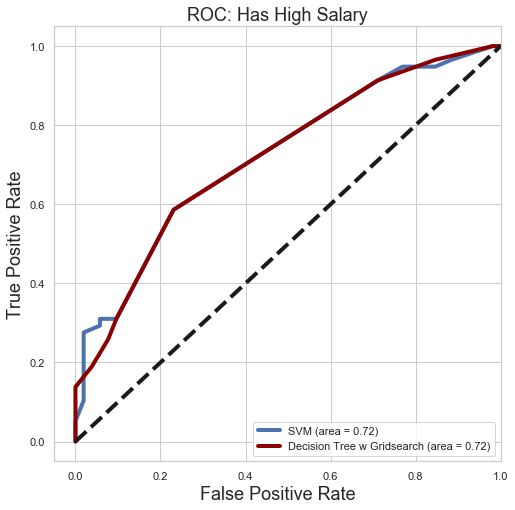

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predictions and predict probabilities.
yhat = dtc_gs.predict(X_test)
yhat_pp_dtc_gs = dtc_gs.predict_proba(X_test)

# Let's eveluate the model with ROC curve.
fpr_dtc_gs, tpr_dtc_gs, _ = roc_curve(y_test, yhat_pp_dtc_gs[:,1])
roc_auc_dtc_gs = auc(fpr_dtc_gs, tpr_dtc_gs)

plt.figure(figsize=[8,8])
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm, linewidth=4)
plt.plot(fpr_dtc_gs, tpr_dtc_gs, label='Decision Tree w Gridsearch (area = %0.2f)' % roc_auc_dtc_gs, linewidth=4, color='darkred')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC: Has High Salary', fontsize=18)
plt.legend(loc="lower right")
plt.show()

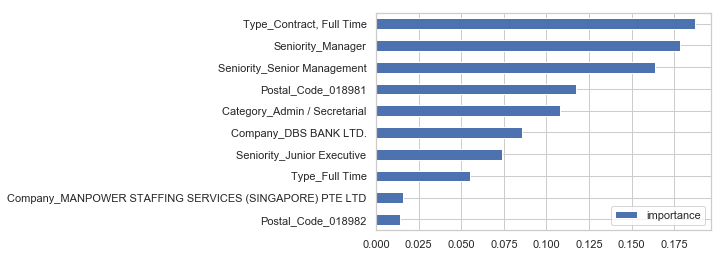

In [56]:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

fi.sort_values('importance', ascending=True, inplace=True)

fi.plot(kind='barh')
plt.yticks(range((len(fi))), fi['feature'])
plt.show()

### Random Forest

Let's use the `Random Forest` for our next classification model. 


- We should search for the best hyperparameters to optimize our model.
- How big do we want the tree to be (max depth)?


> We use Random Forest for the following reasons:
- An ensemble method which builds multiple decision trees and merges them together to get a more accurate and stable prediction.
- Easy to use machine learning algorithm that produces a great result most of the time (even without hyper-parameter tuning).
- Decision trees implicitly perform variable screening or feature selection and ranks the most important features.

In [57]:
# Find the best parameters with Gridsearch.
rfc_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

rfc_gs = GridSearchCV(RandomForestClassifier(), 
                      dtc_params, 
                      cv=5, 
                      verbose=1, 
                      scoring='roc_auc', 
                      n_jobs=-1)

In [58]:
# Use the Gridsearch model to fit the data.
rfc_gs.fit(Xn, y)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1480 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 1925 out of 1925 | elapsed:   17.9s finished
/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/sufyanahmad/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [None, 1, 2, 3, 4], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [59]:
rfc_best = rfc_gs.best_estimator_
print(rfc_gs.best_params_)
print(rfc_gs.best_score_)

{'max_depth': None, 'max_features': 3, 'min_samples_split': 40}
0.6851558450224684


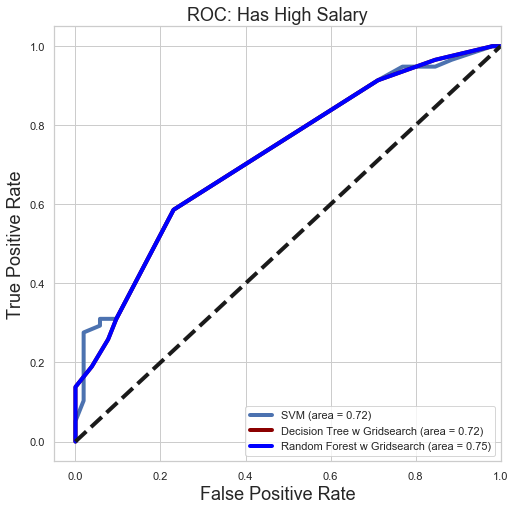

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predictions and predict probabilities.
yhat = rfc_gs.predict(X_test)
yhat_pp_rfc_gs = rfc_gs.predict_proba(X_test)

# Let's eveluate the model with ROC curve.
fpr_rfc_gs, tpr_rfc_gs, _ = roc_curve(y_test, yhat_pp_rfc_gs[:,1])
roc_auc_rfc_gs = auc(fpr_rfc_gs, tpr_rfc_gs)

plt.figure(figsize=[8,8])
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm, linewidth=4)
plt.plot(fpr_dtc_gs, tpr_dtc_gs, label='Decision Tree w Gridsearch (area = %0.2f)' % roc_auc_dtc_gs, linewidth=4, color='darkred')
plt.plot(fpr_dtc_gs, tpr_dtc_gs, label='Random Forest w Gridsearch (area = %0.2f)' % roc_auc_rfc_gs, linewidth=4, color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC: Has High Salary', fontsize=18)
plt.legend(loc="lower right")
plt.show()

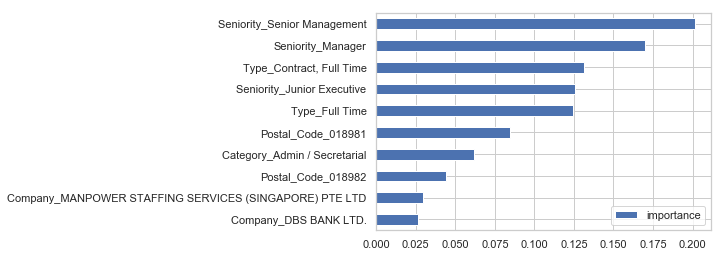

In [61]:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':rfc_best.feature_importances_
    })

fi.sort_values('importance', ascending=True, inplace=True)

fi.plot(kind='barh')
plt.yticks(range((len(fi))), fi['feature'])
plt.show()

### Bagging

Let's use `Bagging` for our next classification model. 


- Bagging and Boosting are similar in that they are both ensemble techniques, where a set of weak learners are combined to create a strong learner that obtains better performance than a single one.


> We use Bagging for the following reasons:
- An effective ensemble method because we are improving the accuracy of a single model by using multiple copies of it trained on different sets of data.
- Not prone to overfitting unlike Boosting.
- Reduces variance while retaining bias.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, stratify=y, test_size=0.2, random_state = 40)

bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 20)
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=20, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

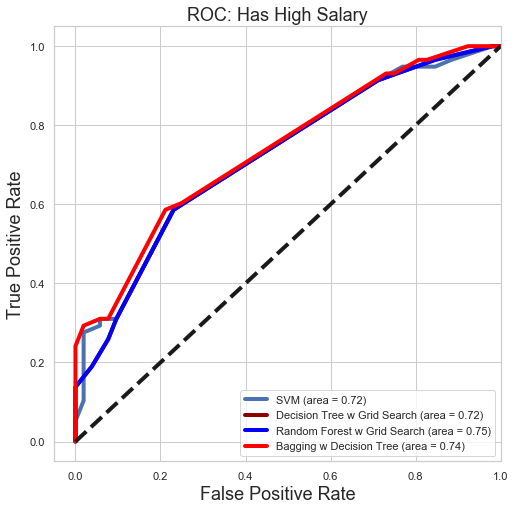

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predictions and predict probabilities.
yhat = bg.predict(X_test)
yhat_pp_bg = bg.predict_proba(X_test)

# Let's eveluate the model with ROC curve.
fpr_bg, tpr_bg, _ = roc_curve(y_test, yhat_pp_bg[:,1])
roc_auc_bg = auc(fpr_bg, tpr_bg)

plt.figure(figsize=[8,8])
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm, linewidth=4)
plt.plot(fpr_dtc_gs, tpr_dtc_gs, label='Decision Tree w Grid Search (area = %0.2f)' % roc_auc_dtc_gs, linewidth=4, color='darkred')
plt.plot(fpr_dtc_gs, tpr_dtc_gs, label='Random Forest w Grid Search (area = %0.2f)' % roc_auc_rfc_gs, linewidth=4, color='blue')
plt.plot(fpr_bg, tpr_bg, label='Bagging w Decision Tree (area = %0.2f)' % roc_auc_bg, linewidth=4, color = 'red')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC: Has High Salary', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [64]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bg.estimators_
], axis=0)

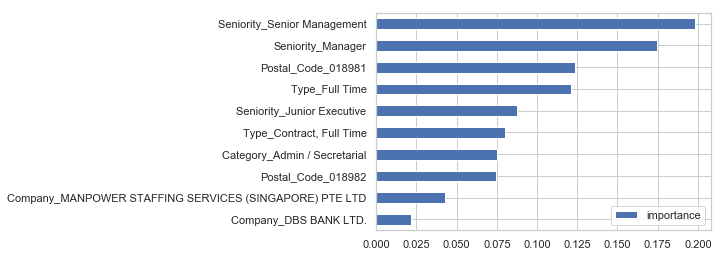

In [65]:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':feature_importances
    })

fi.sort_values('importance', ascending=True, inplace=True)

fi.plot(kind='barh')
plt.yticks(range((len(fi))), fi['feature'])
plt.show()

### Boosting

Let's use `Boosting` for our next classification model. 


- Bagging and Boosting are similar in that they are both ensemble techniques, where a set of weak learners are combined to create a strong learner that obtains better performance than a single one.


> We use Bagging for the following reasons:
- It is a sequential ensemble - tries to add new models that do well where previous models lack

In [66]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 20, learning_rate = 1, random_state = 40)
adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=20, random_state=40)

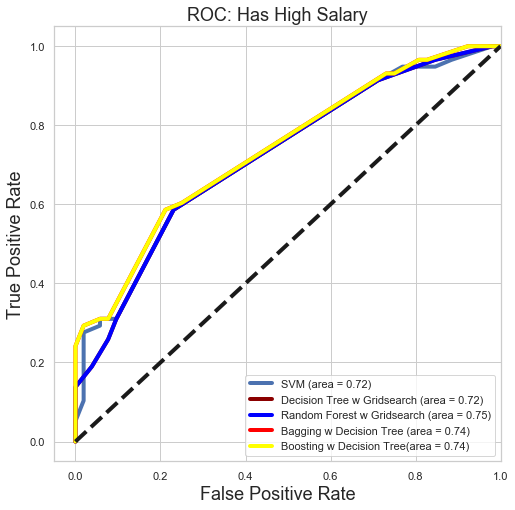

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predictions and predict probabilities.
yhat = adb.predict(X_test)
yhat_pp_adb = adb.predict_proba(X_test)

# Let's eveluate the model with ROC curve.
fpr_adb, tpr_adb, _ = roc_curve(y_test, yhat_pp_adb[:,1])
roc_auc_adb = auc(fpr_adb, tpr_adb)

plt.figure(figsize=[8,8])
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm, linewidth=4)
plt.plot(fpr_dtc_gs, tpr_dtc_gs, label='Decision Tree w Gridsearch (area = %0.2f)' % roc_auc_dtc_gs, linewidth=4, color='darkred')
plt.plot(fpr_dtc_gs, tpr_dtc_gs, label='Random Forest w Gridsearch (area = %0.2f)' % roc_auc_rfc_gs, linewidth=4, color='blue')
plt.plot(fpr_bg, tpr_bg, label='Bagging w Decision Tree (area = %0.2f)' % roc_auc_bg, linewidth=4, color = 'red')
plt.plot(fpr_bg, tpr_bg, label='Boosting w Decision Tree(area = %0.2f)' % roc_auc_adb, linewidth=4, color = 'yellow')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC: Has High Salary', fontsize=18)
plt.legend(loc="lower right")
plt.show()

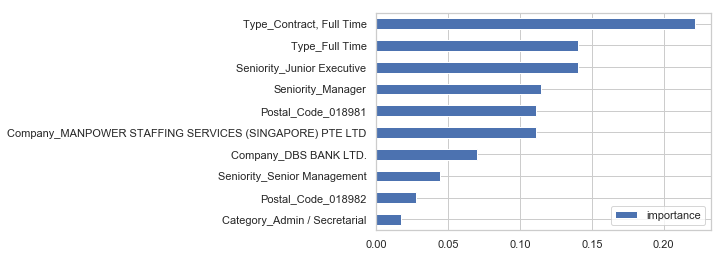

In [68]:
fi = pd.DataFrame({
        'feature':X.columns,
        'importance':adb.feature_importances_
    })

fi.sort_values('importance', ascending=True, inplace=True)

fi.plot(kind='barh')
plt.yticks(range((len(fi))), fi['feature'])
plt.show()

<div class="alert alert-warning">

### Conclusion

Random forest is the best model so far. A look at the feature importances shows the top five features that job seekers should consider for a high salary:
    1. Seniority_Senior Management
    2. Seniority_Manager
    3. Type_Contract, Full Time
    4. Seniority_Junior Executive
    5. Type_Full Time
It is also interesting to see Postal_Code_018981 have some correlation with Salary. A quick check on the location points to Marina Bay Financial Centre.

</div>

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.

<div class="alert alert-warning">

### Find out what separates Data Scientist job from the rest.

- Job description for Data Scientist may differ from one company to the other.
- What are the common skills associated with the role, across all companies?
- Having this knowledge may help a job seeker equip himself with the necessary skills before applying.
- We will approach this by doing a sentiment analysis on Description.

</div>

In [69]:
df.head()

Company  \
0  AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
1                    JOHNSON & JOHNSON PTE. LTD.   
2                       ADECCO PERSONNEL PTE LTD   
3  AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
4                        STANDARD CHARTERED BANK   

                                               Title                 Type  \
0      Data Center Engineering Project Engineer APAC            Full Time   
1                          Lead Data Center Engineer            Permanent   
2                                      Data Engineer  Contract, Full Time   
3  Senior Data Center Infrastructure Availability...            Full Time   
4                                   Business Analyst            Full Time   

               Seniority                                           Category  \
0           Professional                                Design, Engineering   
1           Professional                Engineering, Information Technology   
2              Executive                             Information Technology   
3           Professional  Building and Construction, Design, Engineering...   
4  Manager, Professional                                Banking and Finance   

  Num_Applications                                        Description  \
0               0   The Data Center Global Services (DCGS) team is...   
1               0   The role of Lead Data Center Engineer is owner...   
2               0   The Opportunity\nOur client is an established ...   
3              10   Amazon Web Service (AWS) operates 44 Availabil...   
4               0   About Standard Chartered \nWe are a leading in...   

                                        Requirements  Salary_Min  Salary_Max  \
0  Basic Qualifications -\nMinimum 5 years of mis...      9000.0     12000.0   
1  Required Minimum Education:  Bachelor’s Degree...      5000.0     10000.0   
2  The Talent\nMinimum of 3 - 5 years of relevant...      5000.0      8500.0   
3  BASIC QUALIFICATIONS\nBachelor’s/Diploma/certi...     14000.0     17000.0   
4  Ideal Candidate:\nShould have around 10 years ...      8300.0     16600.0   

   Salary_Mid Postal_Code  Post_Year  Post_Month  Expiry_Year  Expiry_Month  \
0     10500.0      048542       2019           1         2019             3   
1      7500.0      118222       2019           1         2019             3   
2      6750.0      228208       2019           1         2019             3   
3     15500.0      048542       2019           1         2019             3   
4     12450.0      018981       2019           1         2019             2   

   Salary_High  
0          1.0  
1          1.0  
2          1.0  
3          1.0  
4          1.0

- We only want Data Scientist title as our predictor.
- Hence, we will convert the feature to dummy variables.

In [70]:
df["Title"].value_counts()

Data Scientist                                                                                          32
Business Analyst                                                                                        20
Data Engineer                                                                                           18
Data Analyst                                                                                            10
Data Entry Clerk                                                                                         6
Lead Data Scientist                                                                                      5
System Analyst                                                                                           5
Senior Data Scientist                                                                                    4
Database Administrator                                                                                   4
Data Science Consultant              

In [71]:
dummies = pd.get_dummies(df[["Title"]], drop_first = True)

In [72]:
dummies.shape

(550, 391)

In [73]:
# Merge the DataFrame result back onto the original dataframe.
df_2 = df.merge(dummies, left_index = True, right_index = True,how = 'outer')


In [74]:
# We can now drop the original columns.
df_2.drop(["Title"], axis = 1, inplace = True)

In [75]:
df_2.shape

(550, 407)

In [76]:
df_2.columns

Index(['Company', 'Type', 'Seniority', 'Category', 'Num_Applications',
       'Description', 'Requirements', 'Salary_Min', 'Salary_Max', 'Salary_Mid',
       ...
       'Title_VP, Data Privacy, Controls Reporting & Product Governance',
       'Title_VP, Data Scientist, Business Analytics, Consumer Banking Group (180004XI)',
       'Title_VP, Data Strategy, Global Data Programs',
       'Title_VP, Data and Analytics Scale-Up Program Manager, DBS Transformation Group, T&O (1900004Y)',
       'Title_VP, Solution Architect, Group Consumer Banking and Big Data Analytics Technology, T&O (1900006Q)',
       'Title_Vice President, Data Science',
       'Title_Wealth Management – Senior Data Analyst, Client Analytics - Associate',
       'Title_data scientist', 'Title_lead business analyst',
       'Title_workspace analyst'],
      dtype='object', length=407)

- It seems there are other columns that are named differently from Data Scientist (but still refer to the same position).
- As the other columns have one value reach, we will drop them and use Data Scientist as our target variable instead. 

In [77]:
all_data_scientist = df_2.filter(regex='Title_Data Scientist')
all_data_scientist.sum()

Title_Data Scientist                                                                                          32
Title_Data Scientist (62913)                                                                                   1
Title_Data Scientist (Cyber Security)                                                                          1
Title_Data Scientist (Project Manager)                                                                         1
Title_Data Scientist - Information Technology                                                                  1
Title_Data Scientist - Intern (6 months)                                                                       1
Title_Data Scientist - Signal Processing                                                                       1
Title_Data Scientist / Engineer                                                                                1
Title_Data Scientist Manager, Data and Analytics, Advisory                                      

In [78]:
df_2.drop(['Title_Data Scientist (62913)',
       'Title_Data Scientist (Cyber Security)',
       'Title_Data Scientist (Project Manager)',
       'Title_Data Scientist - Information Technology',
       'Title_Data Scientist - Intern (6 months)',
       'Title_Data Scientist - Signal Processing',
       'Title_Data Scientist / Engineer',
       'Title_Data Scientist Manager, Data and Analytics, Advisory',
       'Title_Data Scientist, Analytics - Worldwide Sales',
       'Title_Data Scientist, Global Premium Services, Google Technical Services Professional Services - Singapore',
       'Title_Data Scientists'], axis = 1, inplace = True)

In [79]:
df_2.shape

(550, 396)

In [80]:
df_2

Company  \
0        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
1                          JOHNSON & JOHNSON PTE. LTD.   
2                             ADECCO PERSONNEL PTE LTD   
3        AMAZON ASIA-PACIFIC RESOURCES PRIVATE LIMITED   
4                              STANDARD CHARTERED BANK   
5                 KELLY SERVICES (SINGAPORE) PTE. LTD.   
6                 KELLY SERVICES (SINGAPORE) PTE. LTD.   
7                              STANDARD CHARTERED BANK   
8                  S&P GLOBAL ASIAN HOLDINGS PTE. LTD.   
9                    R SYSTEMS (SINGAPORE) PTE LIMITED   
10                       GOOGLE ASIA PACIFIC PTE. LTD.   
11                                       DBS BANK LTD.   
12                              NIOMETRICS (PTE.) LTD.   
13                              NIOMETRICS (PTE.) LTD.   
14                                     REDMART LIMITED   
15                          JEWEL PAYMENTECH PTE. LTD.   
16                    LAZADA SOUTH EAST ASIA PTE. LTD.   
17            RGF TALENT SOLUTIONS SINGAPORE PTE. LTD.   
18                         KEYTEO CONSULTING PTE. LTD.   
19                              NIOMETRICS (PTE.) LTD.   
20                   DHL EXPRESS (SINGAPORE) PTE. LTD.   
21                                 COMPANY UNDISCLOSED   
22                             SINGAPORE POWER LIMITED   
23                              TBWA SINGAPORE PTE LTD   
24                            FIXED & MOBILE PTE. LTD.   
25                                              UBS AG   
26                    ERNST & YOUNG ADVISORY PTE. LTD.   
27                            LYNX ANALYTICS PTE. LTD.   
28                            NOMURA SINGAPORE LIMITED   
29                          RUBICOR GROUP PTE. LIMITED   
30                       DELOITTE CONSULTING PTE. LTD.   
31                     SCIENTE INTERNATIONAL PTE. LTD.   
32                                 SAKSOFT PTE LIMITED   
33                         SPOTIFY SINGAPORE PTE. LTD.   
34                             STANDARD CHARTERED BANK   
35            RGF TALENT SOLUTIONS SINGAPORE PTE. LTD.   
36       TURNER BROADCASTING SALES SOUTHEAST ASIA, INC   
37                                       DBS BANK LTD.   
38                                       DBS BANK LTD.   
39                   VIRTUSA SINGAPORE PRIVATE LIMITED   
40               OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
41                      TOTAL EBIZ SOLUTIONS PTE. LTD.   
42                             STANDARD CHARTERED BANK   
43               OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
44               OPTIMUM SOLUTIONS (SINGAPORE) PTE LTD   
45                                 COMPANY UNDISCLOSED   
46                      TERADATA (SINGAPORE) PTE. LTD.   
47                           SCHELLDEN GLOBAL SERVICES   
48                          SCHELLDEN GLOBAL PTE. LTD.   
49                    ERNST & YOUNG ADVISORY PTE. LTD.   
50                    ERNST & YOUNG ADVISORY PTE. LTD.   
51      HEWLETT PACKARD ENTERPRISE SINGAPORE PTE. LTD.   
52                                 SMARTSOFT PTE. LTD.   
53                           SCHELLDEN GLOBAL SERVICES   
54                          SCHELLDEN GLOBAL PTE. LTD.   
55                       CAPGEMINI SINGAPORE PTE. LTD.   
56                        NTT DATA SINGAPORE PTE. LTD.   
57                     ICON CONSULTING-GROUP PTE. LTD.   
58                        INFOSYS CONSULTING PTE. LTD.   
59            MUFG FUND SERVICES (SINGAPORE) PTE. LTD.   
60                  THAKRAL BROTHERS (PRIVATE) LIMITED   
61                        INFOSYS CONSULTING PTE. LTD.   
62                        INFOSYS CONSULTING PTE. LTD.   
63            TECHCOM SOLUTIONS ASIA PACIFIC PTE. LTD.   
64       AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED   
65                               U3 INFOTECH PTE. LTD.   
66                        SANDBOX CONSULTING PTE. LTD.   
67                    EIRE SYSTEMS SINGAPORE PTE. LTD.   
68                                 MAKO APAC 

- We will convert the words in Description into features so that we can do our modelling.

In [81]:
# cv = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
cv = CountVectorizer(ngram_range=(2,3), max_features=5000, binary=True, stop_words='english')

words = cv.fit_transform(df_2.Description)

In [82]:
words.shape

(550, 5000)

In [83]:
words = pd.DataFrame(words.todense(), columns=cv.get_feature_names())


In [84]:
words.head()

12 hour  1st level  2nd level  2nd level support  3rd party  \
0        0          0          0                  0          0   
1        0          0          0                  0          0   
2        0          0          0                  0          0   
3        0          0          0                  0          0   
4        0          0          0                  0          0   

   ability influence  ability lead  ability multi  ability multi task  \
0                  0             0              0                   0   
1                  0             0              0                   0   
2                  0             0              0                   0   
3                  0             0              0                   0   
4                  0             0              0                   0   

   ability prioritize           ...            years delivering  \
0                   0           ...                           0   
1                   0           ...                           0   
2                   0           ...                           0   
3                   0           ...                           0   
4                   0           ...                           0   

   years experience  young best  young best practices  young clients  \
0                 0           0                     0              0   
1                 0           0                     0              0   
2                 0           0                     0              0   
3                 0           0                     0              0   
4                 0           0                     0              0   

   young clients asean  young true  young true value  zealand singapore  \
0                    0           0                 0                  0   
1                    0           0                 0                  0   
2                    0           0                 0                  0   
3                    0           0                 0                  0   
4                    0           0                 0                  0   

   zealand singapore hong  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 5000 columns]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(words.values, df_2["Title_Data Scientist"].values, test_size=0.2)

In [86]:
X_train.shape, X_test.shape

((440, 5000), (110, 5000))

In [87]:
nb = BernoulliNB()

nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [88]:
nb_scores = cross_val_score(BernoulliNB(), X_train, y_train, cv=5)
print(nb_scores)
print(np.mean(nb_scores))
print(np.mean(y_train))

[0.91011236 0.84269663 0.875      0.89655172 0.86206897]
0.8772859356838435
0.06136363636363636


In [89]:
feat_lp = nb.feature_log_prob_
is_data_scientist = np.exp(feat_lp[1])
not_data_scientist = np.exp(feat_lp[0])

In [90]:
feat_probs = pd.DataFrame({'is_data_scientist_p':is_data_scientist, 'not_data_scientist_p':not_data_scientist, 'feature':words.columns.values})
feat_probs['is_data_scientist_diff'] = feat_probs.is_data_scientist_p - feat_probs.not_data_scientist_p

In [91]:
# Most popular words associated with Data Scientist.
feat_probs.sort_values('is_data_scientist_diff', ascending=False, inplace=True)
feat_probs.head(20)

is_data_scientist_p  not_data_scientist_p                    feature  \
1309             0.620690              0.074699               data science   
1317             0.586207              0.040964             data scientist   
2720             0.448276              0.096386           machine learning   
1275             0.275862              0.031325                data mining   
195              0.172414              0.002410          applied analytics   
2725             0.172414              0.004819  machine learning projects   
2599             0.172414              0.004819          learning projects   
2858             0.172414              0.007229          models algorithms   
2711             0.172414              0.007229     looking data scientist   
2591             0.172414              0.009639              learning data   
406              0.275862              0.113253                   big data   
2083             0.172414              0.012048           highly motivated   
4123             0.172414              0.012048               sources data   
4213             0.172414              0.012048        strategic direction   
3469             0.172414              0.014458     production environment   
2594             0.172414              0.016867            learning models   
2724             0.172414              0.016867    machine learning models   
1226             0.241379              0.086747                data driven   
1322             0.172414              0.019277            data scientists   
2710             0.172414              0.021687               looking data   

      is_data_scientist_diff  
1309                0.545991  
1317                0.545243  
2720                0.351890  
1275                0.244537  
195                 0.170004  
2725                0.167595  
2599                0.167595  
2858                0.165185  
2711                0.165185  
2591                0.162775  
406                 0.162609  
2083                0.160366  
4123                0.160366  
4213                0.160366  
3469                0.157956  
2594                0.155546  
2724                0.155546  
1226                0.154632  
1322                0.153137  
2710                0.150727

In [92]:
# Most popular words not associated with Data Scientist.
feat_probs.sort_values('is_data_scientist_diff', ascending=True, inplace=True)
feat_probs.head(20)

is_data_scientist_p  not_data_scientist_p                    feature  \
389              0.034483              0.093976             best practices   
1299             0.034483              0.067470               data quality   
484              0.034483              0.065060           business analyst   
1676             0.068966              0.089157                    end end   
4592             0.034483              0.050602                 test cases   
1400             0.068966              0.081928                    day day   
1574             0.034483              0.045783           development team   
3577             0.034483              0.045783            quality control   
3495             0.034483              0.045783         project management   
3791             0.034483              0.045783                 root cause   
4326             0.034483              0.045783               support data   
4957             0.034483              0.045783            working closely   
1899             0.034483              0.045783  functional specifications   
2774             0.034483              0.040964       management reporting   
1269             0.068966              0.074699            data management   
568              0.103448              0.108434      business requirements   
4905             0.034483              0.038554                 wide range   
2993             0.034483              0.038554      operational processes   
2440             0.034483              0.038554            job description   
32               0.068966              0.072289                     ad hoc   

      is_data_scientist_diff  
389                -0.059493  
1299               -0.032987  
484                -0.030577  
1676               -0.020191  
4592               -0.016120  
1400               -0.012962  
1574               -0.011300  
3577               -0.011300  
3495               -0.011300  
3791               -0.011300  
4326               -0.011300  
4957               -0.011300  
1899               -0.011300  
2774               -0.006481  
1269               -0.005733  
568                -0.004985  
4905               -0.004071  
2993               -0.004071  
2440               -0.004071  
32                 -0.003324

In [93]:
print(nb.score(X_test, y_test))
print(np.mean(y_test))

0.8909090909090909
0.045454545454545456


<div class="alert alert-warning">

### Conclusion

These are among the top 20 common skills for Data Scientists across all companies:
    1. machine learning
    2. data mining
    3. applied analytics
    4. machine learning projects
    5. models algorithms
    6. big data
    7. highly motivated
    8. strategic direction
    9. production environment
    10. machine learning models
    11. data driven

</div>

### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.
